### Importing the relevant libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss

## Data Preprocessing

### Importing the Database

In [3]:
#Loading the data into student_data
student_data = pd.read_csv(r'C:\Users\sangu\OneDrive\Desktop\My_Code\My_Projects\Student_purchase_prediction\student_data.csv')

In [4]:
#Copy the Data to a new Dataframe
data = student_data.copy()

In [5]:
# Displaying the first 5 rows of the DataFrame for a quick overview
data.head(5)

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [6]:
# Displaying concise information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


### Removing Outliers

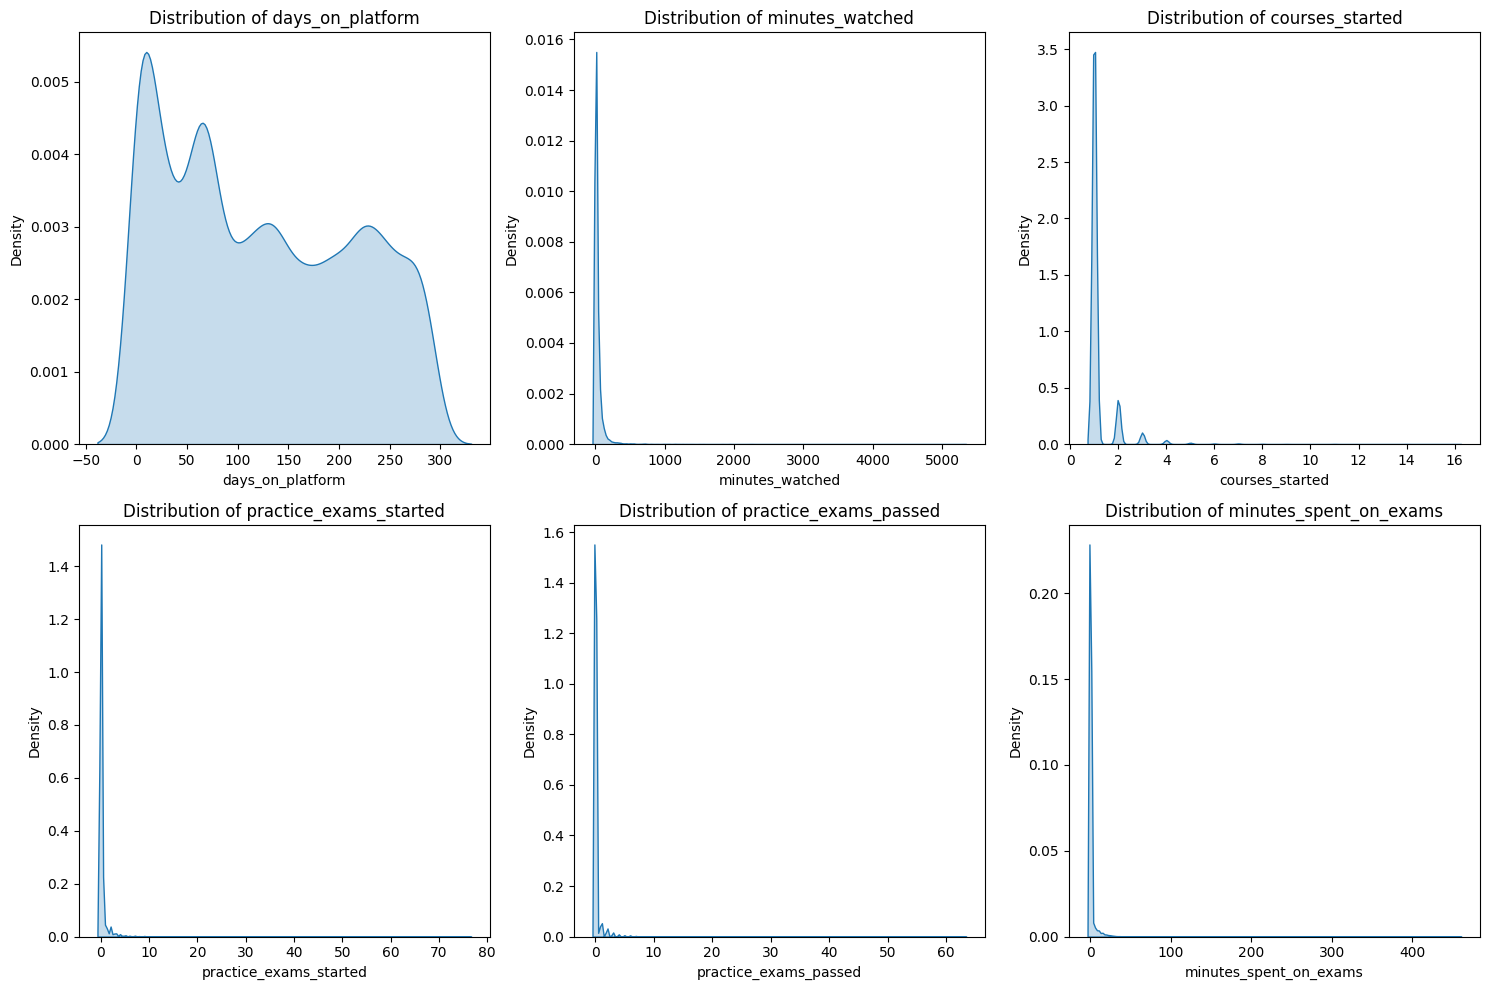

In [12]:
# Examine the distribution plots of numerical features and their skewness

numerical_features = ['days_on_platform', 'minutes_watched', 'courses_started', 
                      'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']
                      
#Plot the Distribution of Numerical Features

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3

    sns.kdeplot(data[feature], fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Adjust subplot layout
plt.tight_layout()
plt.show()

In [8]:
# Remove data points based on the Distribution

data_no_outliers = data[(data['minutes_watched'] <= 1000) &
                   (data['courses_started'] <= 10) &
                   (data['practice_exams_started'] <= 10) &
                   (data['practice_exams_passed'] <= 10) &
                   (data['minutes_spent_on_exams'] <= 40)]

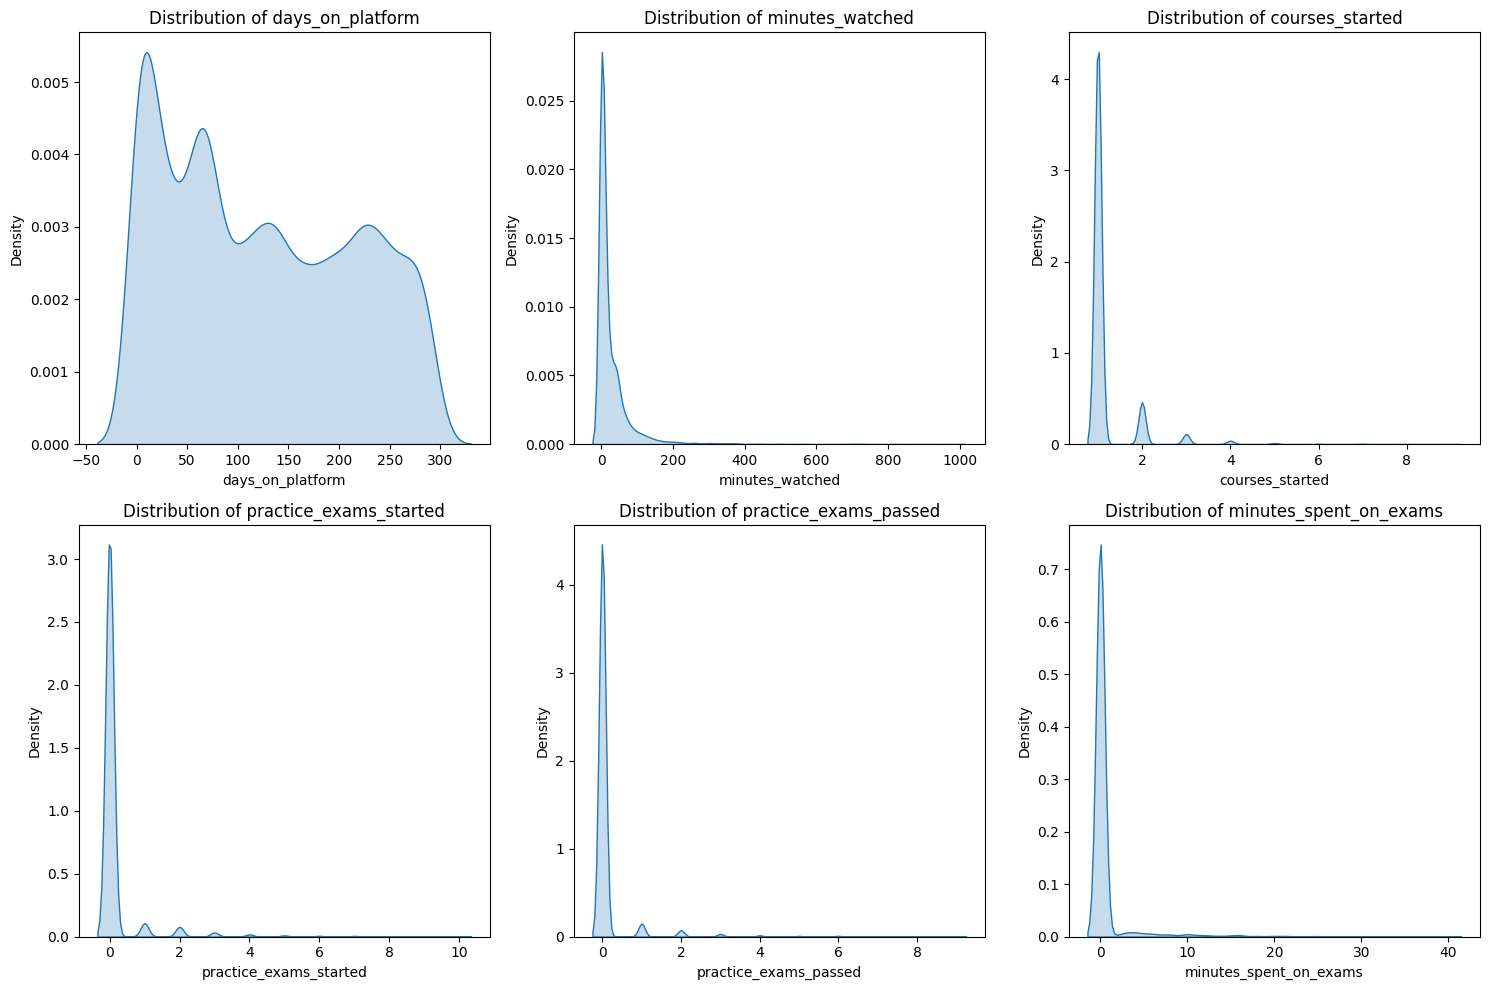

In [11]:
# Plot Distributions after removing the outliers

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3

    sns.kdeplot(data_no_outliers[feature], fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Adjust subplot layout
plt.tight_layout()
plt.show()

### Checking for Multicollinearity

In [17]:
# Calculate and display the Variance Inflation Factor (VIF) for the predictor variables.

X = data[['days_on_platform', 'minutes_watched', 'courses_started',
          'practice_exams_started', 'practice_exams_passed', 'minutes_spent_on_exams']]

# Add a constant term to the predictor variables to calculate intercept
X['Intercept'] = 1

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

                 Variable       VIF
0        days_on_platform  1.012561
1         minutes_watched  2.075257
2         courses_started  1.474114
3  practice_exams_started  7.590213
4   practice_exams_passed  6.479270
5  minutes_spent_on_exams  3.621551
6               Intercept  6.743327


C:\Users\sangu\AppData\Local\Temp\ipykernel_30360\3958394575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Intercept'] = 1


In [18]:
# Drop practice_exams_passed
X = X.drop('practice_exams_passed', axis=1)

In [19]:
# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)

                 Variable       VIF
0        days_on_platform  1.012497
1         minutes_watched  2.000991
2         courses_started  1.472019
3  practice_exams_started  3.453246
4  minutes_spent_on_exams  3.587225
5               Intercept  6.741725


### Dealing with NaN Values

In [20]:
#Check for Null Values
data.isnull().sum()

student_country           9
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [21]:
#Fill NaN with NAM as it misinterpreted NA(Namibia) as Null by Dataframe.

data['student_country'] = data['student_country'].fillna('NAM')

In [22]:
data.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_started    0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Encoding the Data

In [23]:
# display the unique values in the 'student_country' column of data
data['student_country'].unique()

array(['US', 'SG', 'TR', 'KE', 'IN', 'LK', 'BG', 'IT', 'ES', 'PH', 'BD',
       'CA', 'VN', 'PT', 'JP', 'ET', 'PS', 'PK', 'AZ', 'NG', 'KW', 'ZA',
       'FR', 'AR', 'MK', 'TH', 'MA', 'TN', 'EG', 'GB', 'OM', 'RU', 'SE',
       'DE', 'AL', 'PL', 'MD', 'BR', 'NP', 'DZ', 'LB', 'TW', 'NL', 'SA',
       'JO', 'AO', 'RS', 'AE', 'ID', 'DK', 'CO', 'GH', 'AU', 'UA', 'SV',
       'KR', 'IL', 'BE', 'NZ', 'CH', 'LY', 'MU', 'UG', 'UZ', 'GE', 'CI',
       'CY', 'NAM', 'CN', 'BS', 'GR', 'SL', 'GT', 'SO', 'RO', 'DO', 'HK',
       'MX', 'MY', 'AT', 'LT', 'CR', 'CM', 'JM', 'IQ', 'EC', 'YE', 'NI',
       'QA', 'BH', 'ZW', 'SD', 'MZ', 'CL', 'NO', 'IE', 'LU', 'HN', 'MM',
       'PA', 'FI', 'TG', 'BJ', 'BY', 'CZ', 'SK', 'AM', 'VC', 'HR', 'LS',
       'PY', 'LA', 'HT', 'GM', 'SN', 'HU', 'RW', 'KZ', 'KH', 'PE', 'DJ',
       'EE', 'JE', 'MO', 'ZM', 'TZ', 'BM', 'VE', 'SI', 'GA', 'BB', 'BO',
       'ME', 'TT', 'LR', 'UY', 'GN', 'MG', 'BF', 'BA', 'MR', 'XK', 'BZ',
       'KM', 'KG', 'PR', 'LV', 'BW', 'MV', 'SZ', '

In [24]:
# Create an instance of OrdinalEncoder with the specified parameters
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=175)

# Fit and transform the 'student_country' column in your training data
data['student_country_enc'] = enc.fit_transform(data['student_country'].to_numpy().reshape(-1, 1))

In [25]:
#Cross check the data
data.head(2)

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased,student_country_enc
0,US,288,358.1,1,2,2,15.81,0,160.0
1,SG,260,1.7,1,1,0,16.00,0,140.0


In [26]:
#Drop student_country from data after encoding
data = data.drop('student_country', axis=1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   days_on_platform        17761 non-null  int64  
 1   minutes_watched         17761 non-null  float64
 2   courses_started         17761 non-null  int64  
 3   practice_exams_started  17761 non-null  int64  
 4   practice_exams_passed   17761 non-null  int64  
 5   minutes_spent_on_exams  17761 non-null  float64
 6   purchased               17761 non-null  int64  
 7   student_country_enc     17761 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


### Splitting the Data

In [30]:
# Extracting the target variable 'purchased' and creating a new DataFrame 'y'.
y = data[['purchased']]

# Extracting the features and creating a new DataFrame 'X' by dropping the 'purchased' column.
X = data.drop('purchased', axis=1)

# Splitting the dataset into training and testing sets.
# X_train and y_train represent the features and target variable for training, while X_test and y_test represent those for testing.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split
# 'stratify' ensures that the class distribution is maintained.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


## Creating a Logistic Regression Model

In [32]:
# Creating a logistic regression classifier with a specified random state for reproducibility.
clf1 = LogisticRegression(random_state=100)

# Training the logistic regression classifier on the training data.
clf1.fit(X_train, y_train)

# Predicting the target variable 'y' on the test data using the trained classifier.
y_pred = clf1.predict(X_test)


C:\Users\sangu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sangu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Calculating and printing various evaluation metrics for the test set predictions for Logistic Regression
# including accuracy, precision, recall, F1 score, ROC AUC score, and log loss.
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1_sc= f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
log_ls = log_loss(y_pred, y_test)

print('TEST SET prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)
print('F1_Score=', f1_sc)
print('Roc_Auc_Score=', roc_auc)
print('log_loss_Score=', log_ls)

TEST SET prediction scores:
Accuracy score = 0.9520378293177212
Precision score = 0.5661764705882353
Recall score = 0.8651685393258427
F1_Score= 0.6844444444444444
Roc_Auc_Score= 0.9113815863854897
log_loss_Score= 1.7287318558617324


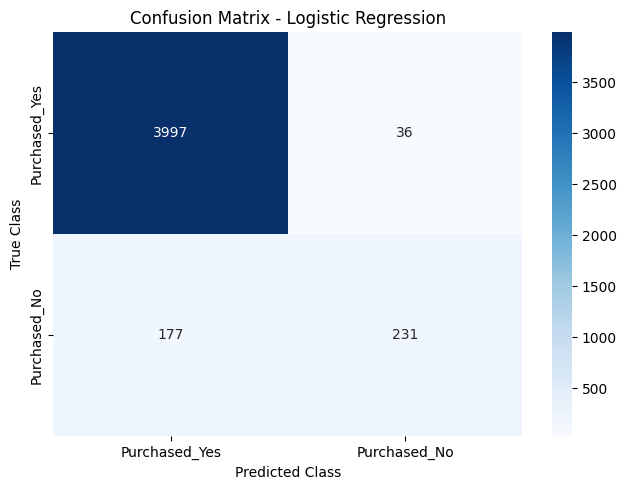

In [34]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
class_names = ['Purchased_Yes', 'Purchased_No']
dataframe_Confusion =  pd.DataFrame(confusion_mat, index=class_names, columns=class_names) 

sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

## Creating a K-Nearest Neighbors Model

In [53]:
# Define the range of parameters to tune
parameters_knn = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance']
}

In [54]:
# Create an instance of GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), parameters_knn, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

# Get the best model
best_knn_clf = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred = best_knn_clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
classification_report(y_test, y_pred)

C:\Users\sangu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sangu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\sangu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      4033\n           1       0.82      0.75      0.78       408\n\n    accuracy                           0.96      4441\n   macro avg       0.90      0.87      0.88      4441\nweighted avg       0.96      0.96      0.96      4441\n'

In [55]:
#Printing the best n_neighbors and weights
print(best_knn_clf.n_neighbors)
print(best_knn_clf.weights)

11
distance


In [56]:
# Calculating and printing various evaluation metrics for the test set predictions K Nearest Neighbor 
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1_sc= f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
log_ls = log_loss(y_pred, y_test)

print('TEST SET prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)
print('F1_Score=', f1_sc)
print('Roc_Auc_Score=', roc_auc)
print('log_loss_Score=', log_ls)

TEST SET prediction scores:
Accuracy score = 0.9617203332582752
Precision score = 0.75
Recall score = 0.8181818181818182
F1_Score= 0.7826086956521738
Roc_Auc_Score= 0.8965509533495766
log_loss_Score= 1.3797390398896456


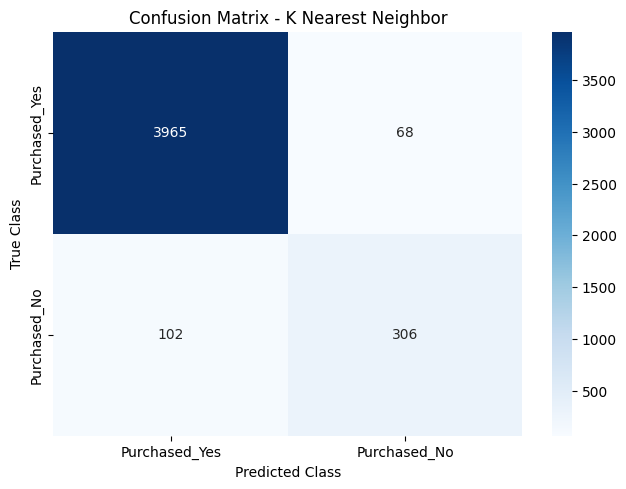

In [57]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
class_names = ['Purchased_Yes', 'Purchased_No']
dataframe_Confusion =  pd.DataFrame(confusion_mat, index=class_names, columns=class_names) 

sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix - K Nearest Neighbor")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

## Creating a Decision Trees Model

In [42]:
# Define the range of parameters to tune
parameters_dt = {
    'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]
}

In [43]:
# Create an instance of GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=365), parameters_dt, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_dt.fit(X_train, y_train)

# Get the best model
best_dt_clf = grid_search_dt.best_estimator_

# Evaluate the best model on the test set
y_pred = best_dt_clf.predict(X_test)

In [44]:
# Calculating and printing various evaluation metrics for the test set predictions for Decision Tree
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1_sc= f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
log_ls = log_loss(y_pred, y_test)

print('TEST SET prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)
print('F1_Score=', f1_sc)
print('Roc_Auc_Score=', roc_auc)
print('log_loss_Score=', log_ls)

TEST SET prediction scores:
Accuracy score = 0.9619455077685206
Precision score = 0.6593137254901961
Recall score = 0.8996655518394648
F1_Score= 0.760961810466761
Roc_Auc_Score= 0.9330534422644934
log_loss_Score= 1.3716229278902947


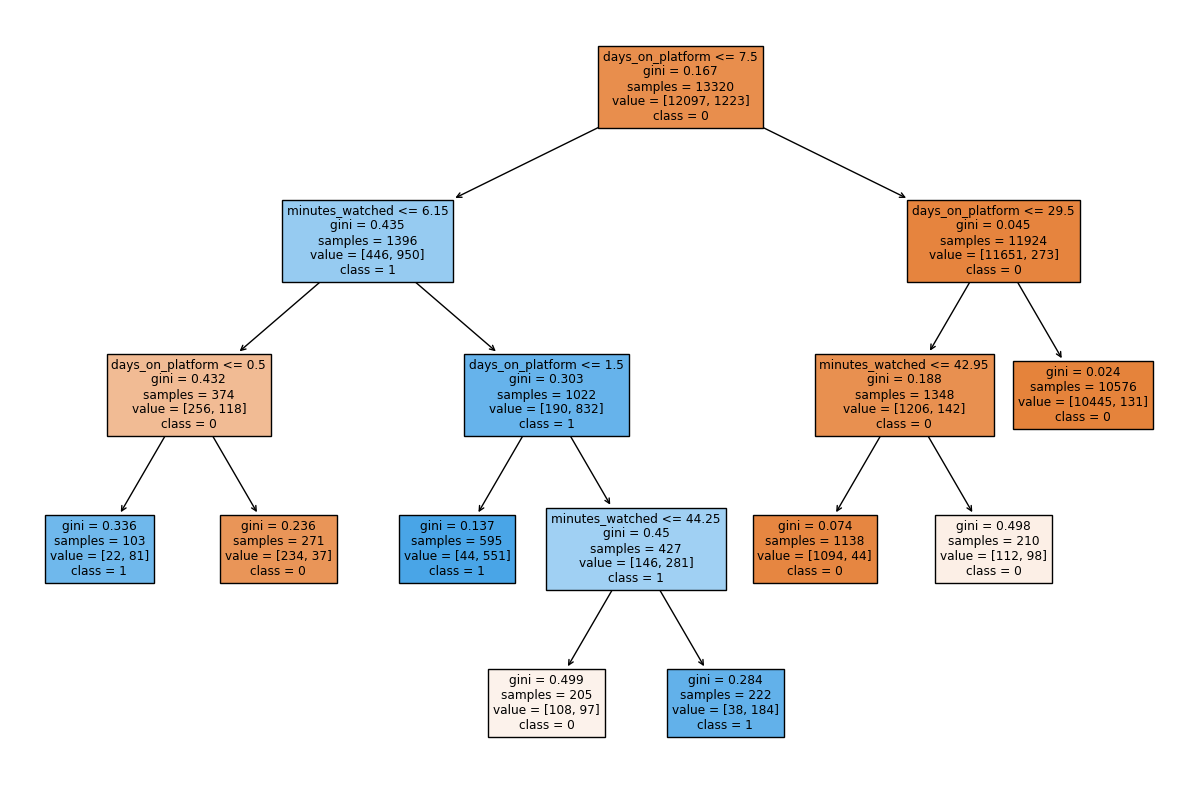

In [45]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_dt_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

## Creating a Random Forests Model

In [46]:
# Get the best ccp_alpha from above, we can use the same for Random Forest model
best_ccp_alpha = best_dt_clf.ccp_alpha

# Print the best ccp_alpha
print("Best ccp_alpha:", best_ccp_alpha)

Best ccp_alpha: 0.001


In [49]:
# Create an instance of RandomForestClassifier
clf = RandomForestClassifier(ccp_alpha=best_ccp_alpha, random_state=365)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

C:\Users\sangu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [50]:
# Calculating and printing various evaluation metrics for the test set predictions for Random Forest
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1_sc= f1_score(y_pred, y_test)
roc_auc = roc_auc_score(y_pred, y_test)
log_ls = log_loss(y_pred, y_test)

print('TEST SET prediction scores:\nAccuracy score =', acc)
print('Precision score =', pre)
print('Recall score =', rec)
print('F1_Score=', f1_sc)
print('Roc_Auc_Score=', roc_auc)
print('log_loss_Score=', log_ls)

TEST SET prediction scores:
Accuracy score = 0.9664489979734294
Precision score = 0.7352941176470589
Recall score = 0.8797653958944281
F1_Score= 0.801068090787717
Roc_Auc_Score= 0.926711966239897
log_loss_Score= 1.209300687903278


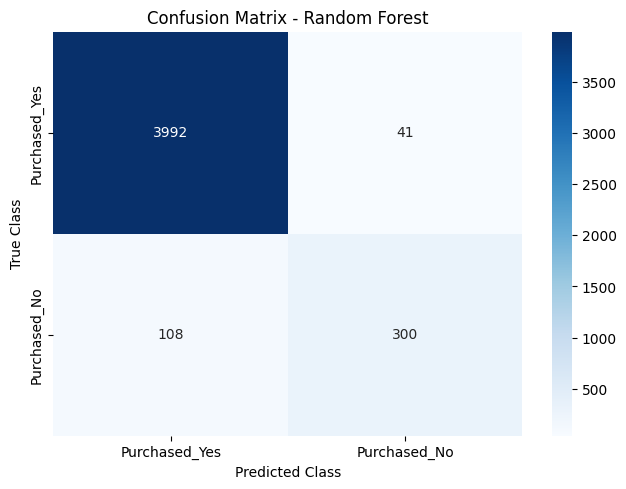

In [52]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
class_names = ['Purchased_Yes', 'Purchased_No']
dataframe_Confusion =  pd.DataFrame(confusion_mat, index=class_names, columns=class_names) 

sns.heatmap(dataframe_Confusion, annot=True,  cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.savefig('./confusion_matrix.png')
plt.show()
plt.close()

Looking at all the evaluation metrics, we can conclude that the Random Forest model performs the best on the data. It has the highest F1 score and Accuracy compared to the other models we tested.